# Proyek Analisis Data: Bike Sharing Dataset
---
- **Nama:** Moch Rifky Aulia Adikusumah
- **Email:** rifkyadi67@gmail.com
- **ID Dicoding:** rifkyadi
---

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1: Bagaimana distribusi penggunaan sepeda pada setiap jam?
- Pertanyaan 2: Bagaimana pengaruh hari kerja (workingday) terhadap penggunaan sepeda?
- Pertanyaan 3: Bagaimana variasi penggunaan sepeda berdasarkan musim?
- Pertanyaan 4: Bagaimana distribusi penggunaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.duplicated().sum()

0

In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.duplicated().sum()

0

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [10]:
# Mengubah kolom dteday dengan tipe data yang sesuai
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
# Mengubah angka menjadi keterangan pada day_df

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# Mengubah angka menjadi keterangan pada hour_df

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# Save data yang sudah dibersihkan
hour_df.to_csv('data/hour_cleaned.csv', index=False)
day_df.to_csv('data/day_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

In [16]:
# load dataset yang sudah dibersihkan
hour_df = pd.read_csv('data/hour_cleaned.csv')
day_df = pd.read_csv('data/day_cleaned.csv')


In [17]:
# Distribusi penggunaan sepeda per jam
hourly_usage = hour_df.groupby('hr')['cnt'].describe()

# Rata-rata penggunaan sepeda pada setiap jam
hourly_mean_usage = hourly_usage['mean']
hourly_mean_usage

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: mean, dtype: float64

In [18]:
# Korelasi antara suhu dan jumlah penggunaan sepeda
temp_cnt_corr = hour_df['temp'].corr(hour_df['cnt'])
temp_cnt_corr

0.40477227577865854

In [19]:
# Rata-rata penggunaan sepeda pada hari kerja vs bukan hari kerja
workingday_usage = hour_df.groupby('workingday')['cnt'].describe()
workingday_usage

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
Holiday,5514.0,181.405332,172.853832,1.0,40.0,119.0,292.0,783.0
Workingday,11865.0,193.207754,185.107477,1.0,40.0,151.0,277.0,977.0


In [20]:
# Rata-rata penggunaan sepeda per musim
season_usage = hour_df.groupby('season')['cnt'].describe()
season_usage

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
Spring,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
Summer,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
Winter,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


In [21]:
# Rata-rata penggunaan sepeda per hari dalam seminggu
weekday_usage = day_df.groupby('weekday')['cnt'].describe()
weekday_usage

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Fri,104.0,4690.288462,1874.624870,1167.0,3390.75,4601.5,5900.50,8362.0
Mon,105.0,4338.123810,1793.074013,22.0,3310.00,4359.0,5875.00,7525.0
Sat,105.0,4550.542857,2196.693009,627.0,2732.00,4521.0,6140.00,8714.0
Sun,105.0,4228.828571,1872.496629,605.0,2918.00,4334.0,5464.00,8227.0
Thu,104.0,4667.259615,1939.433317,431.0,3270.75,4721.0,6286.00,7804.0
Tue,104.0,4510.663462,1826.911642,683.0,3579.25,4576.5,5769.00,7767.0
Wed,104.0,4548.538462,2038.095884,441.0,2653.25,4642.5,6175.75,8173.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penggunaan sepeda pada setiap jam?

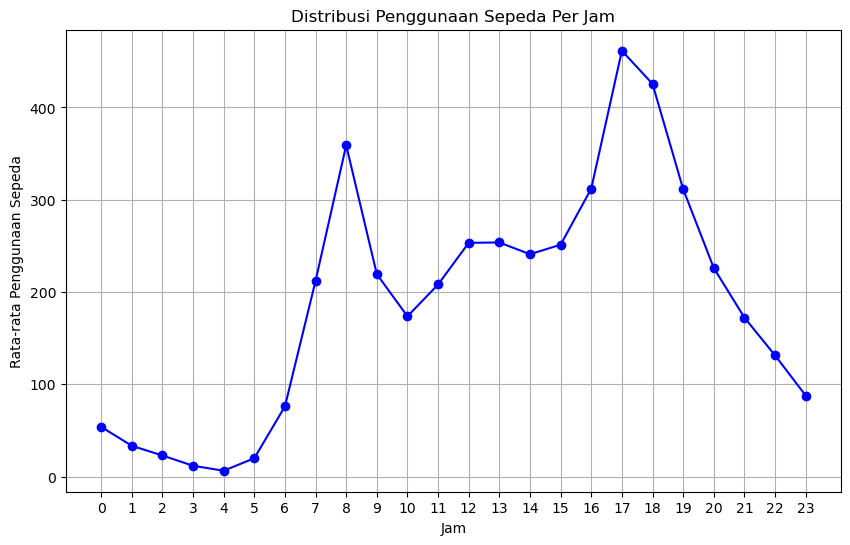

In [22]:
# Data
hourly_mean_usage
hours = range(24)  # Asumsikan jam dari 0 hingga 23

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.plot(hours, hourly_mean_usage, marker='o', linestyle='-', color='b')

# Menambahkan judul dan label
plt.title('Distribusi Penggunaan Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.xticks(hours)  # Menampilkan semua jam di sumbu x

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

### Pertanyaan 2: Bagaimana pengaruh hari kerja (workingday) terhadap penggunaan sepeda?

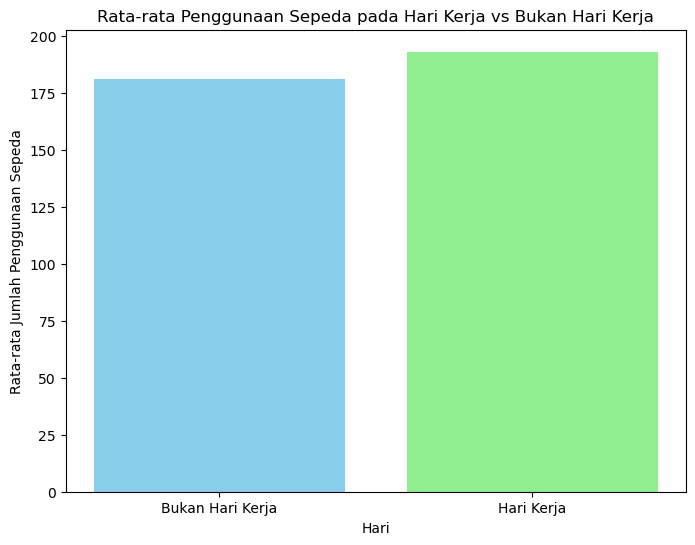

In [23]:
workingday_usage = hour_df.groupby('workingday')['cnt'].mean()
labels = ['Bukan Hari Kerja', 'Hari Kerja']

plt.figure(figsize=(8, 6))
plt.bar(labels, workingday_usage, color=['skyblue', 'lightgreen'])
plt.title('Rata-rata Penggunaan Sepeda pada Hari Kerja vs Bukan Hari Kerja')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penggunaan Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana variasi penggunaan sepeda berdasarkan musim?

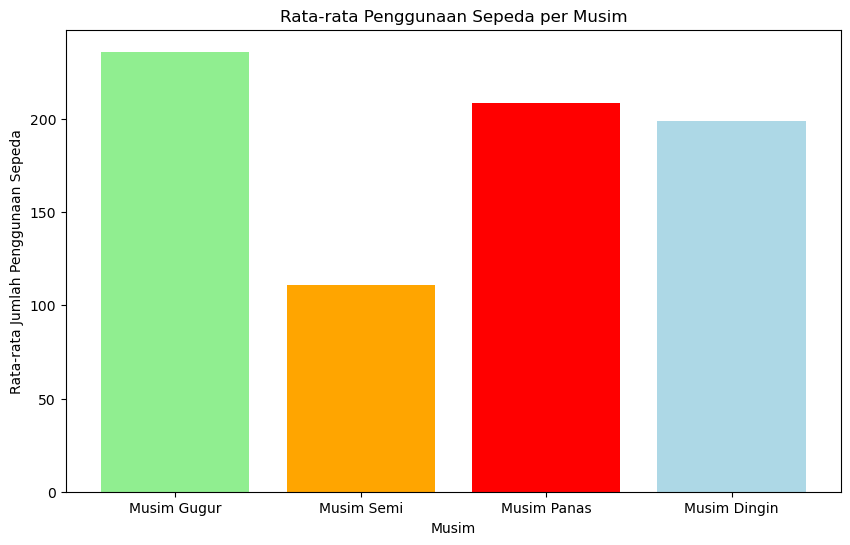

In [24]:
season_usage = hour_df.groupby('season')['cnt'].mean()
labels = ['Musim Gugur', 'Musim Semi', 'Musim Panas', 'Musim Dingin']

plt.figure(figsize=(10, 6))
plt.bar(labels, season_usage, color=['lightgreen', 'orange', 'red', 'lightblue'])
plt.title('Rata-rata Penggunaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penggunaan Sepeda')
plt.show()

### Pertanyaan 4: Bagaimana distribusi penggunaan sepeda berdasarkan hari dalam seminggu?

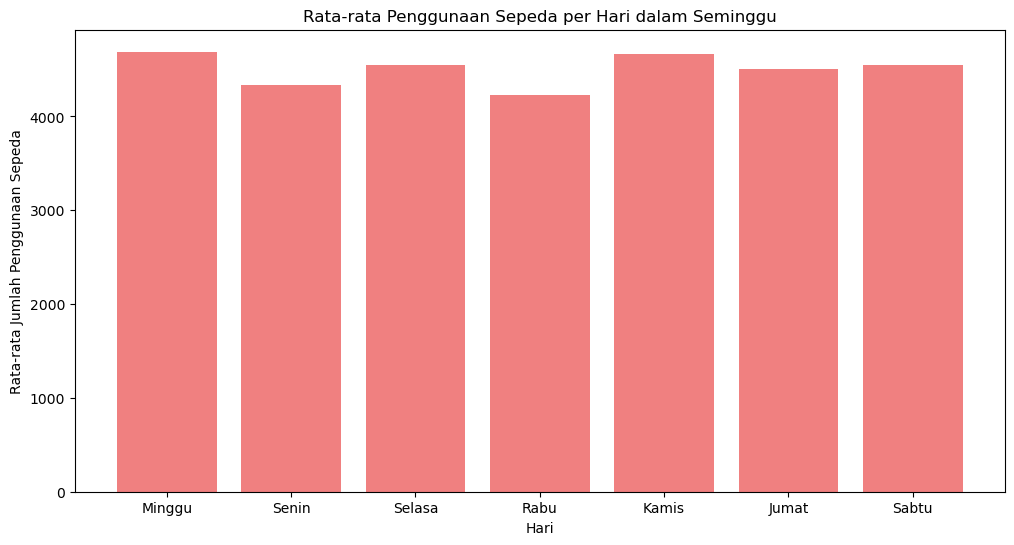

In [25]:
weekday_usage = day_df.groupby('weekday')['cnt'].mean()
labels = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

plt.figure(figsize=(12, 6))
plt.bar(labels, weekday_usage, color='lightcoral')
plt.title('Rata-rata Penggunaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penggunaan Sepeda')
plt.show()

## Conclusion
- Penggunaan sepeda cenderung memiliki puncak pada jam-jam tertentu. Pada jam-jam pagi sekitar pukul 7-9 dan sore sekitar pukul 17-19, terlihat lonjakan penggunaan sepeda. Ini menunjukkan bahwa banyak orang menggunakan sepeda untuk bepergian selama jam sibuk, mungkin untuk perjalanan kerja atau sekolah.

- Tidak terdapat perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan hari non-kerja. Walaupun jumlah penggunaan sepeda cenderung lebih tinggi pada hari kerja, yang mungkin disebabkan oleh penggunaan sepeda untuk transportasi sehari-hari. Namun, ada juga penggunaan yang cukup tinggi pada hari non-kerja, yang bisa dikaitkan dengan aktivitas rekreasi.

- Penggunaan sepeda bervariasi secara signifikan berdasarkan musim. Penggunaan sepeda paling tinggi terjadi selama musim gugur dan musim panas, sementara penggunaan cenderung lebih rendah pada musim dingin dan musim semi. Faktor cuaca yang lebih menguntungkan selama musim panas dan gugur mungkin mendorong lebih banyak orang untuk menggunakan sepeda.

- Penggunaan sepeda menunjukkan tren yang cukup stabil sepanjang minggu, dengan peningkatan rata-rata pada hari Minggu, kemungkinan karena aktivitas rekreasi atau olahraga di hari libur. Hari Kamis juga mencatat penggunaan sepeda yang tinggi, mungkin karena orang memanfaatkannya sebagai alat transportasi ke tempat kerja. Sebaliknya, Hari Rabu menunjukkan sedikit penurunan dalam penggunaan sepeda, meskipun perbedaannya tidak terlalu signifikan dibandingkan hari-hari lain. Secara keseluruhan, data menunjukkan bahwa penggunaan sepeda relatif konsisten, dengan sedikit peningkatan pada akhir pekan dan beberapa hari kerja tertentu.